#  *Estudo* em data Science Jonas Felipe Barros Silva
# Feito no Jupyter no VScode

1.	Contextualização, motivação, importância
O estudo desse projeto visa encontrar a demanda de produtos ,a fim de conseguir estabelecer quais os mais vendidos, e no fim estimar quais serão os proximos produtos a serem vendidos 

2. Base de dados 
A base de dados agora é um arquivo CSV 'BD.csv'  de 9800 linhas com vendas de uma loja de artigos nos EUA de 2015 ate 2018. Esse arquivo será modificadon e tratado na analise exploratoria.
Vou usar a lib panda para importar os dados, como vemos no exemplo abaixo.


# **Análise Exploratória**

#https://drive.google.com/file/d/1dxvMs9imkXDZVA7G8T27uLQXct3jfp-p/view?usp=sharing
Passar para pasta do Colab 



In [193]:
import pandas as pd
import numpy as np
import matplotlib as mpl
BD = pd.read_csv('BD.csv')
print (BD)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

3.	Indicar o seu objetivo (qual a contribuição pretendida)? 
Analise de vendas e conseguir prever os proximos produtos a serem vendidos, tambem conseguir criar uma proporçao de saida de vendas.

 Análise Exploratória:

1.	Existem valores faltantes? Como foram tratados? Todas as informaçoes são relevantes ? 

Como são dados de coleçao de vendas, todo e qualquer dado, faltante iremos excluir a linha, vide que vamos analisar todas as linhas que estão faltando dados e ver as coorelaçes entre elas e verificar se essas linhas já não estavam completas na base de dados ultilizaremos a panda

In [194]:

BD2 = BD.dropna()
print(BD2)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

com isso nosso banco de dados reduziu para 7343 linhas.
Como vou relevar alguns dados para a analise , vou remover primeiramente dados irrelevantes para nossa analise e depois vou tratar os dados novamente, e verificar se não perdi muitas amostras ja mostrando que a simples falta de dados podem fazer com o nosso objetivo final , 
Vamos remover Order ID , Order Date ,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region

In [195]:

BD3 = BD.drop(columns=["Order ID", "Order Date", "Ship Mode", "Customer ID", "Customer Name", "Segment", "Country", "City", "State", "Postal Code", "Region"])


Apos vou refazer o processo de pagar dados invalidos

In [196]:
BD3=BD3.dropna()
print(BD3)


      Row ID   Ship Date       Product ID         Category Sub-Category  \
0          1  11/11/2017  FUR-BO-10001798        Furniture    Bookcases   
1          2  11/11/2017  FUR-CH-10000454        Furniture       Chairs   
2          3  16/06/2017  OFF-LA-10000240  Office Supplies       Labels   
3          4  18/10/2016  FUR-TA-10000577        Furniture       Tables   
4          5  18/10/2016  OFF-ST-10000760  Office Supplies      Storage   
...      ...         ...              ...              ...          ...   
9795    9796  28/05/2017  OFF-BI-10003429  Office Supplies      Binders   
9796    9797  17/01/2016  OFF-AR-10001374  Office Supplies          Art   
9797    9798  17/01/2016  TEC-PH-10004977       Technology       Phones   
9798    9799  17/01/2016  TEC-PH-10000912       Technology       Phones   
9799    9800  17/01/2016  TEC-AC-10000487       Technology  Accessories   

                                           Product Name  Sales  
0                     Bush Somerse

Salvando CSV novo

In [197]:
BD3.to_csv(r'./BD3.csv', encoding='utf-8', header='true')

Possuimos 7353 linhas, 10 linhas a mais se excluissimos todas as linhas com dados faltantes , mas possuimos 2.447 menos que a original , então vamosexcluir somentes dados pertinentes ou seja as que não possuem o valor , a data de entrega sera extimada nesse ponto vou traduzir o banco da dados tbm mas o valor contunuara em doolar, prmieiro vou descobrir quais valores faltam e se tem como preencher nossa base de dados



In [198]:
BD.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [199]:
BD.isnull().sum()
BD4 = BD.drop(columns=["Row ID","Order ID", "Customer ID", "Segment", "Country", "State", "Postal Code", "Region"])
BD.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Vou Traduzir o nome das col unas e separar o mes e os anos da data de pedido

In [200]:

BD4.columns= ['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente',
        'Cidade', 'ID do produto', 'Categoria', 'Subcategoria', 'Nome do produto',
        'Vendas']
BD4.info()
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
BD4['Data_ped'] = pd.to_datetime(BD4['Data_ped'], dayfirst = True)
BD4['Data_env'] = pd.to_datetime(BD4['Data_env'], dayfirst = True)
BD4.info()
BD4['ano'] = BD4['Data_ped'].dt.year
BD4['mes'] = BD4['Data_ped'].dt.month_name()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data_ped         9800 non-null   object 
 1   Data_env         9800 non-null   object 
 2   Modo de envio    9800 non-null   object 
 3   Nome do cliente  9800 non-null   object 
 4   Cidade           9800 non-null   object 
 5   ID do produto    9800 non-null   object 
 6   Categoria        9800 non-null   object 
 7   Subcategoria     9800 non-null   object 
 8   Nome do produto  9800 non-null   object 
 9   Vendas           9800 non-null   float64
dtypes: float64(1), object(9)
memory usage: 765.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data_ped         9800 non-null   datetime64[ns]
 1   Data_env        

In [201]:
BD4.head()

,Data_ped,Data_env,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,November
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,November
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Los Angeles,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,June
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,October
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,October


Salvando o novo arquivo

In [202]:
BD4.to_csv(r'./BD4.csv', encoding='utf-8', header='true')

2.	Identificação de Outliers

array([[<AxesSubplot:title={'center':'Vendas'}>,
        <AxesSubplot:title={'center':'ano'}>]], dtype=object)

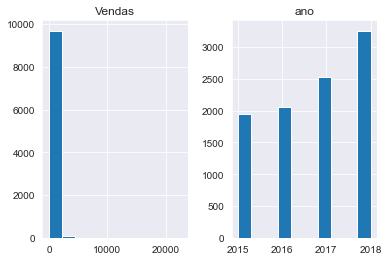

In [203]:
BD4.hist()

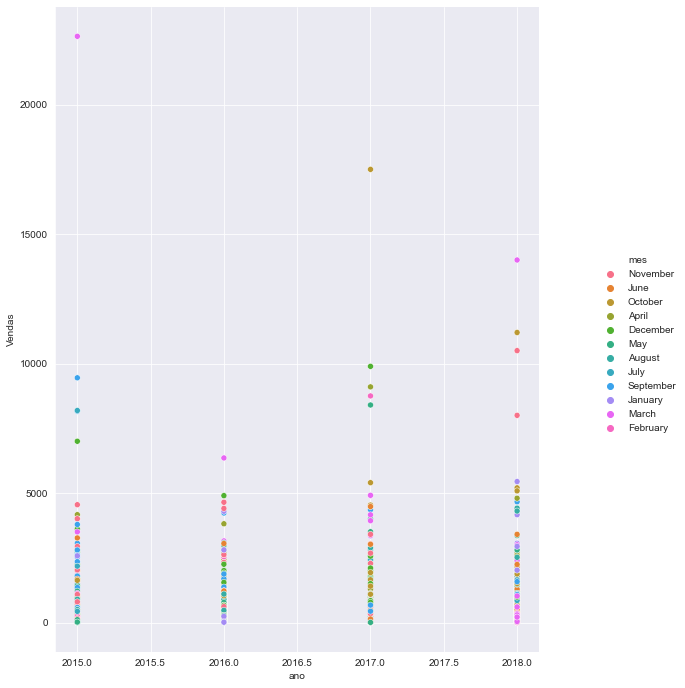

In [204]:
import seaborn as sns
fig=sns.relplot(x="ano", y="Vendas",hue="mes", data=BD4)
fig.fig.set_size_inches(10,10)

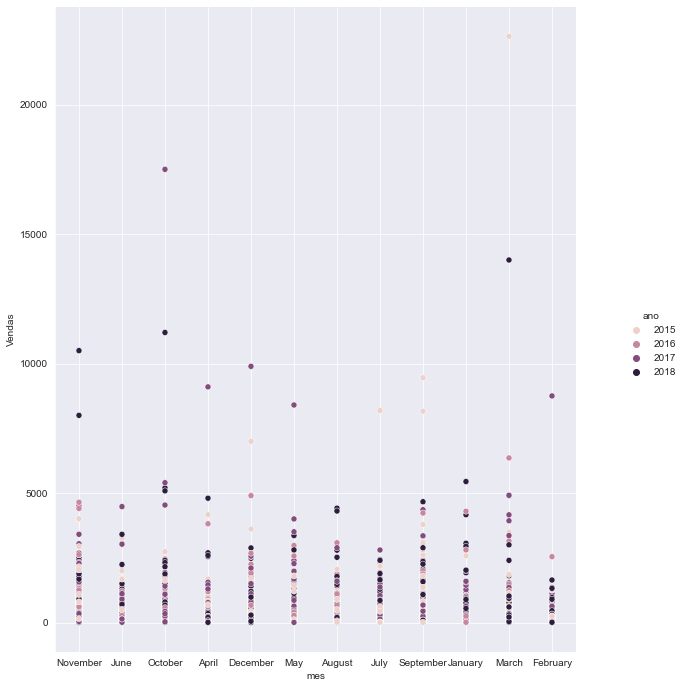

In [205]:
fig=sns.relplot(x="mes", y="Vendas",hue="ano", data=BD4)
fig.fig.set_size_inches(10,10)

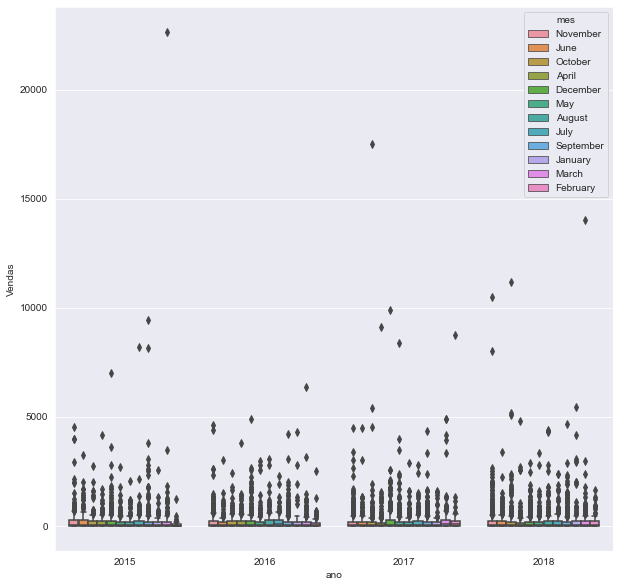

In [206]:
plt.figure(figsize=(10, 10))
fig=sns.boxplot(x="ano", y="Vendas" ,hue='mes',data=BD4,whis=1.5)

3.	Estatística Descritiva dos Dados;

4.	Técnicas de Feature Engineering utilizadas (conforme slide 08 da Aula 05);
Tratados dados faltantes detectados outliers devo remove-los? 
Pegar esses pontos com linha de codigo 

In [207]:
#Codigo https://estatsite.com.br/2020/03/23/detectando-outliers-pelo-desvio-padrao-no-python/ Yukio Editado por mim 
import matplotlib.pyplot as plt
import statistics

# inicia uma lista vazia onde colocaremos os outliers
outliers = []
outlier_idx =[]
BD4.reset_index(drop=True, inplace=True)
# desvio padrão 
desv_pad = statistics.stdev(BD4['Vendas'])

# média dos seus dados
media = statistics.mean(BD4['Vendas'])

# coloca o limite que determina se é outlier
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

# Localiza outliers e anexa à nossa lista que iniciamos sem nada
for outlier in BD4['Vendas']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)
        outlier_idx.extend(BD4[BD4["Vendas"]==outlier].index)

# exibe a lista com os outliers
print(outliers)

# conta quantos elementos são outliers
print('Temos ',len(outliers),'Outliers')

# percentual da coluna que é outlier
print('São Outiliers',len(outliers)/9800,"%") 

[3083.43, 8159.951999999999, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.7039999999997, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.9440000000004, 4912.59, 4228.704000000001, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.3759999999997, 17499.95, 2887.0559999999996, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803

Drop na colunas com outliers

In [208]:
#outlier_idx=float(outlier_idx)

print(outliers)
print((outlier_idx))
BD4=BD4.drop(outlier_idx)

[3083.43, 8159.951999999999, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.7039999999997, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.9440000000004, 4912.59, 4228.704000000001, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.3759999999997, 17499.95, 2887.0559999999996, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803

##**Conclusão Análise exploratoria**#
 Aqui verificamos os ouliers restantes estão dentro de nossa proposta como visto divididos por mês ainda possuimos bastantes mas era experado que se ocorresem vendas inesperadas durante alguns meses do ano, e esses valores fazem parte da nossa analise 

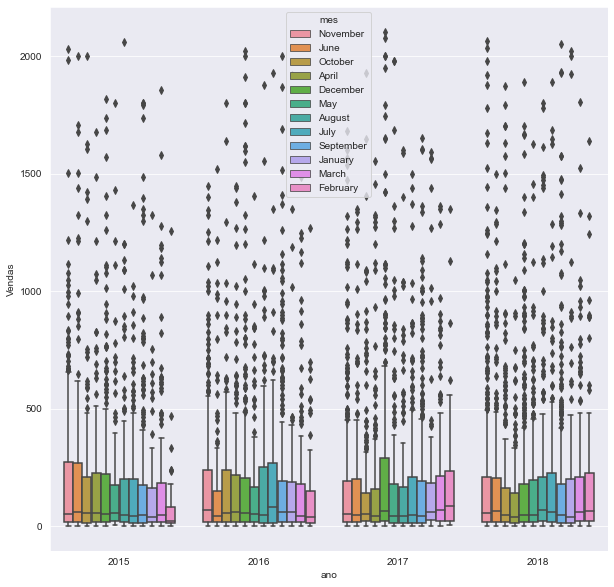

In [209]:
plt.figure(figsize=(10, 10))
fig=sns.boxplot(x="ano", y="Vendas" ,hue='mes',data=BD4,whis=1.5)

6.	Visualização das principais Variáveis;Separando em 4 data frames por ano , grafico de numeros de vendas mes a mes por anos excluindo os outliers extremos 

<Figure size 720x720 with 0 Axes>

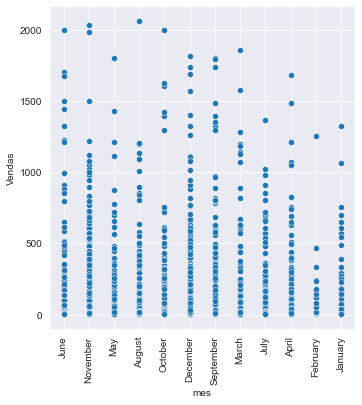

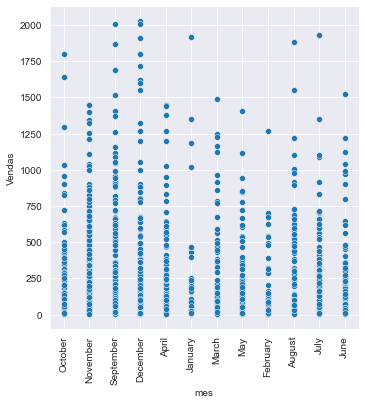

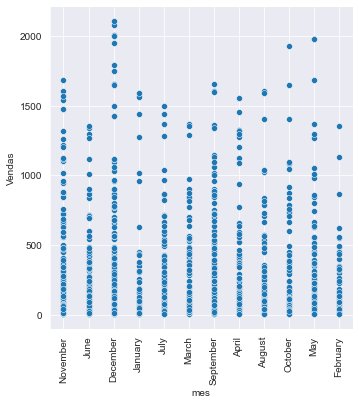

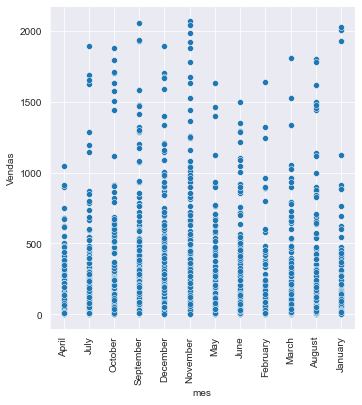

In [210]:
import seaborn as sns
plt.figure(figsize=(10, 10))

df5=BD4[BD4['ano'] == 2015] 
df6=BD4[BD4['ano'] == 2016] 
df7=BD4[BD4['ano'] == 2017] 
df8=BD4[BD4['ano'] == 2018] 
fig = sns.relplot(data= df5,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df6,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df7,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)
fig=sns.relplot(data= df8,x='mes', y="Vendas")
fig.set_xticklabels( rotation=90)

array([[<AxesSubplot:title={'center':'Vendas'}>,
        <AxesSubplot:title={'center':'ano'}>]], dtype=object)

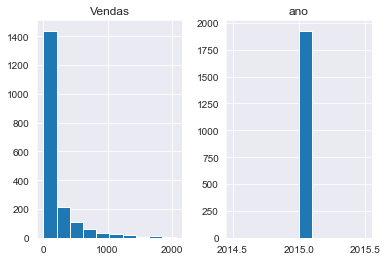

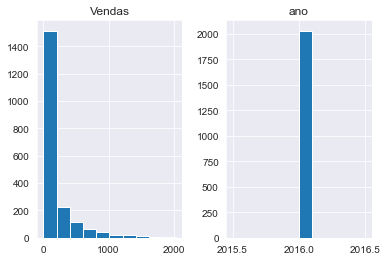

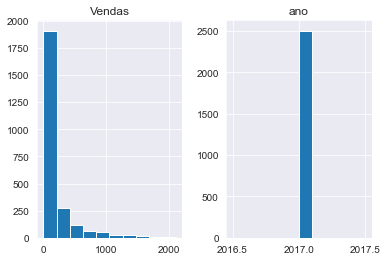

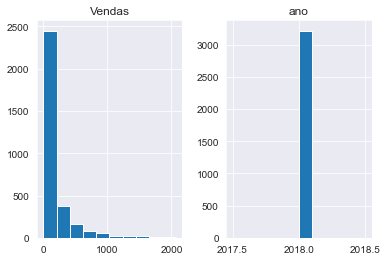

In [211]:
df5.hist()
df6.hist()
df7.hist()
df8.hist()

In [212]:
BD4.head()

,Data_ped,Data_env,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,November
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Henderson,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,November
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Los Angeles,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,June
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,October
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,October


In [213]:
BD4=BD4.reset_index()
BD4.info

<bound method DataFrame.info of       index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798     

Vamos obter algumas informaçoes interresantes da nossa Base de Dados 

In [214]:
print('Nome do produto que mais se repete',df5['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df5['Subcategoria'].mode())
print('Media do numero vendas',df5['Vendas'].mean())
print('Numero de objeto mais vendido',df5['ID do produto'].max())
df5.describe()

Nome do produto que mais se repete 0    Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 186.74035967825662
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano
count,1927.00,1927.00
mean,186.74,2015.00
std,312.77,0.00
min,0.85,2015.00
25%,15.96,2015.00
50%,49.79,2015.00
75%,211.21,2015.00
max,2060.74,2015.00


In [215]:
print('Nome do produto que mais se repete',df6['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df6['Subcategoria'].mode())
print('Media do numero vendas',df6['Vendas'].mean())
print('Numero de objeto mais vendido',df6['ID do produto'].max())
df6.describe()

Nome do produto que mais se repete 0    Easy-staple paper
1      Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 186.27381448275858
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano
count,2030.00,2030.00
mean,186.27,2016.00
std,305.52,0.00
min,0.98,2016.00
25%,17.12,2016.00
50%,56.49,2016.00
75%,206.35,2016.00
max,2025.36,2016.00


In [216]:
print('Nome do produto que mais se repete',df7['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df7['Subcategoria'].mode())
print('Media do numero vendas',df7['Vendas'].mean())
print('Numero de objeto mais vendido',df7['ID do produto'].max())
df7.describe()

Nome do produto que mais se repete 0    Staple envelope
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 182.3480173391932
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano
count,2503.00,2503.00
mean,182.35,2017.00
std,307.13,0.00
min,0.84,2017.00
25%,17.74,2017.00
50%,51.75,2017.00
75%,195.04,2017.00
max,2104.55,2017.00


In [217]:
print('Nome do produto que mais se repete',df8['Nome do produto'].mode())
print('Sub Categoria que mais se repete',df8['Subcategoria'].mode())
print('Media do numero vendas',df8['Vendas'].mean())
print('Numero de objeto mais vendido',df8['ID do produto'].max())
df8.describe()

Nome do produto que mais se repete 0    Easy-staple paper
dtype: object
Sub Categoria que mais se repete 0    Binders
dtype: object
Media do numero vendas 174.76088566987931
Numero de objeto mais vendido TEC-PH-10004977


,Vendas,ano
count,3217.00,3217.00
mean,174.76,2018.00
std,300.92,0.00
min,0.44,2018.00
25%,16.77,2018.00
50%,51.55,2018.00
75%,195.96,2018.00
max,2065.32,2018.00


# **Análise profunda dos dados** 
# Machine learnig 

Nesta fase final , vamos atacar prontamente nosso problema atraves de regressão linear para descobrirmos quais seram os proximos setores/produtos vendidos , primeiramente vou passar nossa base de dados pela biblioteca lazy Predict para descobrir qual dos 40 modelos instalados de regressão sera, o mais indicado e depois da escolha do mesmo vamos manipular os hiper parametros para obter uma melhor resposta , ja dividimos nosso df em 4 e vamos usar essa divisão como teste e validação de forma deslisante.

In [218]:
!pip install pyforest 
!pip install lazypredict

In [219]:
# Importing important libraries

import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Setting up max columns displayes to 100
pd.options.display.max_columns = None
pd.set_option('display.width', None)

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Set theme
sns.set_style('darkgrid')

In [227]:
# Importing dataset
df = BD4
df.columns

Index(['index', 'Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente',
       'Cidade', 'ID do produto', 'Categoria', 'Subcategoria',
       'Nome do produto', 'Vendas', 'ano', 'mes'],
      dtype='object')

In [228]:
#df.columns()

In [229]:
df.head

<bound method NDFrame.head of       index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798       

In [230]:
# Creating train test split
import calendar
dic = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May','06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
dic = dict((v,k) for k,v in dic.items())
df['Mes'] = df['mes'].apply(lambda X: dic[X]).astype(int)
x=df.drop(columns=['Data_ped', 'Data_env', 'Modo de envio', 'Nome do cliente','Cidade', 'ID do produto', 'Categoria', 'Subcategoria','Nome do produto','mes','Vendas'])
y = df.Vendas

In [231]:
print(df)

      index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798        Furniture    Bookcases   
1  

In [232]:
x.head
y.head

<bound method NDFrame.head of 0      261.96
1      731.94
2       14.62
3      957.58
4       22.37
        ...  
9672     3.80
9673    10.37
9674   235.19
9675    26.38
9676    10.38
Name: Vendas, Length: 9677, dtype: float64>

In [233]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (7257, 3) Target:  (7257,)
Test set - Features:  (2420, 3) Target:  (2420,)


In [234]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:39<00:00,  1.06it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
SGDRegressor                                -0.00       0.00 303.78   
PoissonRegressor                            -0.00       0.00 303.79   
Lars                                        -0.00       0.00 303.79   
OrthogonalMatchingPursuitCV                 -0.00       0.00 303.79   
LinearRegression                            -0.00       0.00 303.79   
TransformedTargetRegressor                  -0.00       0.00 303.79   
Ridge                                       -0.00       0.00 303.79   
RidgeCV                                     -0.00       0.00 303.79   
Lasso                                       -0.00       0.00 303.84   
MLPRegressor                                -0.00       0.00 303.85   
ElasticNet                                  -0.00       0.00 303.87   
GammaRegressor                              -0.00       0.00 303.89   
Genera

In [235]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [236]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [237]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

In [238]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [239]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: -0.029210327359629362
Mean Squared Error: 308.33160315088884


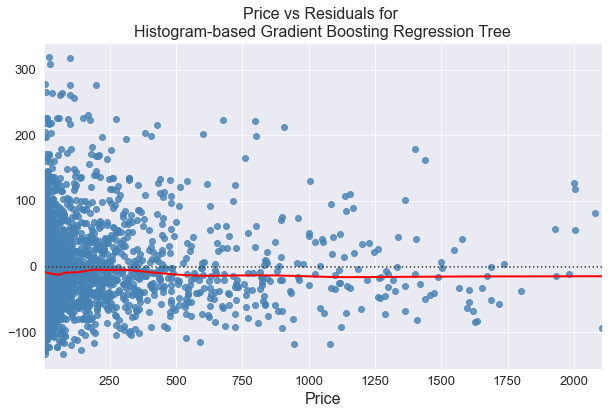

In [240]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

Com isso vemos que ignorando os dados e so pensando na data de venda e valores não conseguiremos chegar em um modelo ideal.Devido ao baixa correlação dos dados passados não podem ser usados para prever os novos valores.

tentar aplicar label encoding nos demais itens, transformar valores categoricos em dados númericos

#### Importando o LabelEncoder

In [241]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [242]:
# Importing dataset
df = BD4
df.columns
df.head

<bound method NDFrame.head of       index   Data_ped   Data_env   Modo de envio   Nome do cliente  \
0         0 2017-11-08 2017-11-11    Second Class       Claire Gute   
1         1 2017-11-08 2017-11-11    Second Class       Claire Gute   
2         2 2017-06-12 2017-06-16    Second Class   Darrin Van Huff   
3         3 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
4         4 2016-10-11 2016-10-18  Standard Class    Sean O'Donnell   
...     ...        ...        ...             ...               ...   
9672   9795 2017-05-21 2017-05-28  Standard Class     Sally Hughsby   
9673   9796 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9674   9797 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9675   9798 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   
9676   9799 2016-01-12 2016-01-17  Standard Class  Cindy Schnelling   

               Cidade    ID do produto        Categoria Subcategoria  \
0           Henderson  FUR-BO-10001798       

#### Função para aplicar o LabelEncoder em cada atributo

In [243]:
def generate_labelencoder(atts):
  for attr in atts:
    df[attr] = le.fit_transform(df[attr])
  return df

In [244]:
df=df.drop(columns=['Mes','Data_env','Data_ped'])
df.columns

Index(['index', 'Modo de envio', 'Nome do cliente', 'Cidade', 'ID do produto',
       'Categoria', 'Subcategoria', 'Nome do produto', 'Vendas', 'ano', 'mes'],
      dtype='object')

In [245]:
df.head()

,index,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes
0,0,Second Class,Claire Gute,Henderson,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,November
1,1,Second Class,Claire Gute,Henderson,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,November
2,2,Second Class,Darrin Van Huff,Los Angeles,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,June
3,3,Standard Class,Sean O'Donnell,Fort Lauderdale,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,October
4,4,Standard Class,Sean O'Donnell,Fort Lauderdale,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,October


In [246]:
df = generate_labelencoder(['ID do produto','Cidade','Nome do cliente','Modo de envio','Categoria','Subcategoria','Nome do produto','mes'])

In [247]:
df.head()

,index,Modo de envio,Nome do cliente,Cidade,ID do produto,Categoria,Subcategoria,Nome do produto,Vendas,ano,mes
0,0,2,166,194,12,0,4,384,261.96,2017,9
1,1,2,166,194,55,0,5,828,731.94,2017,9
2,2,2,201,265,946,1,10,1419,14.62,2017,6
3,3,3,687,153,319,0,16,364,957.58,2016,10
4,4,3,687,153,1316,1,14,567,22.37,2016,10


In [319]:
x=df.drop(columns='Vendas')
y = df.Vendas
x.head
y.head

<bound method NDFrame.head of 0      261.96
1      731.94
2       14.62
3      957.58
4       22.37
        ...  
9672     3.80
9673    10.37
9674   235.19
9675    26.38
9676    10.38
Name: Vendas, Length: 9677, dtype: float64>

In [320]:

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.25)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (7257, 10) Target:  (7257,)
Test set - Features:  (2420, 10) Target:  (2420,)


In [321]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:48<00:00,  1.14s/it]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
RandomForestRegressor                        0.45       0.46   223.91   
XGBRegressor                                 0.45       0.45   225.85   
ExtraTreesRegressor                          0.41       0.41   232.61   
LGBMRegressor                                0.41       0.41   233.79   
HistGradientBoostingRegressor                0.40       0.40   235.55   
BaggingRegressor                             0.39       0.40   236.27   
GradientBoostingRegressor                    0.36       0.36   243.25   
MLPRegressor                                 0.16       0.16   277.76   
AdaBoostRegressor                            0.11       0.11   286.16   
DecisionTreeRegressor                        0.11       0.11   286.21   
KNeighborsRegressor                          0.05       0.05   295.54   
PoissonRegressor                             0.02  

Apos isso tivemos um novo modelo de regressão ganhador, considerando todos os parametros iclusive o tempo
                   com um tempo de 0.51               
Model                                 Adjusted      R-Squared       RMSE  \                              
XGBRegressor                                 0.45       0.45   225.85    

Agora vou tentar ganhar* do algoritimo automatico 

In [322]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from pandas import Series, DataFrame

Vou testar com varios tamanhos de amostra de teste e treino (70/30) melhor Cross-Validator 

In [323]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.30)

In [324]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            9677 non-null   int64  
 1   Modo de envio    9677 non-null   int32  
 2   Nome do cliente  9677 non-null   int32  
 3   Cidade           9677 non-null   int32  
 4   ID do produto    9677 non-null   int32  
 5   Categoria        9677 non-null   int32  
 6   Subcategoria     9677 non-null   int32  
 7   Nome do produto  9677 non-null   int32  
 8   Vendas           9677 non-null   float64
 9   ano              9677 non-null   int64  
 10  mes              9677 non-null   int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 529.3 KB


In [326]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [327]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.8967369632570233


Aleluia um bom Score

In [328]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.41


Sabia que o cross validator daria algum valor menor que 50% mas mesmo assim foi um otimo valor para nossa amostra de vendas

In [332]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



MSE: 56253.61
RMSE: 237.18


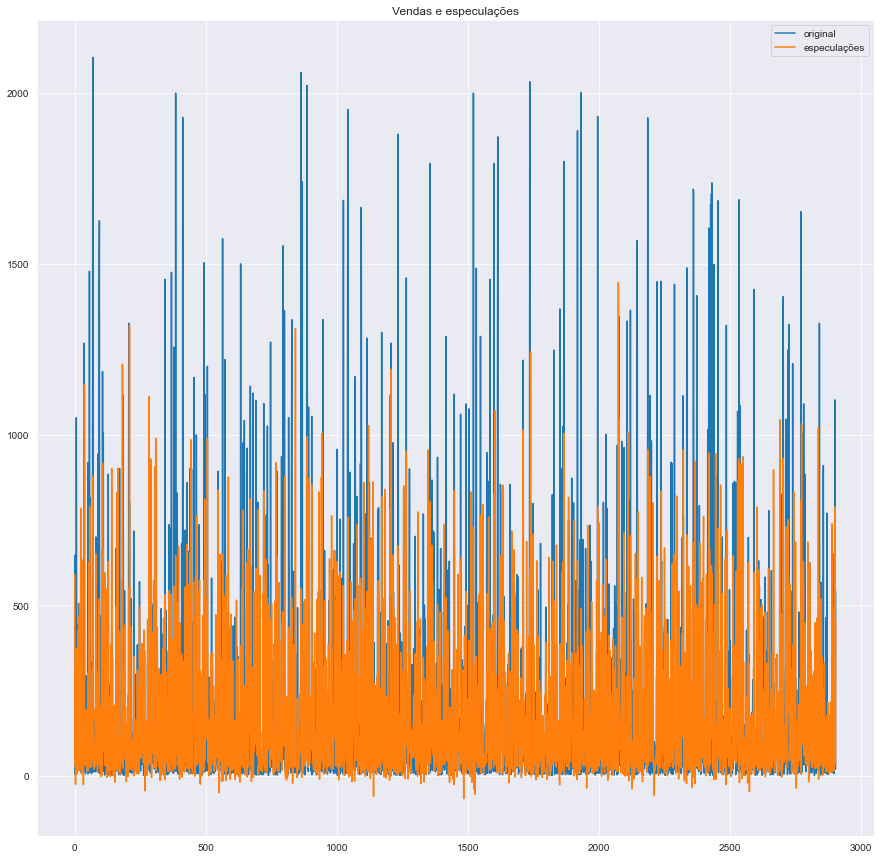

In [333]:
plt.figure(figsize=(15, 15))
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="especulações")
plt.title("Vendas e especulações")
plt.legend()
plt.show()

In [ ]:
len(ypred)

2904

Acredito que estamos agora com um modelo muito mais preciso que pode aferir os futuros das vendas.